![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

### <font color = "0D5D2E">  __Importando os pacotes__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### <font color = "0D5D2E">  __Importando a base__

In [2]:
filename_features = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\features.txt"
filename_labels = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\activity_labels.txt"

filename_subtrain = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\train\subject_train.txt"
filename_xtrain = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\train\X_train.txt"
filename_ytrain = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\train\y_train.txt"

filename_subtest = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\test\subject_test.txt"
ffilename_xtest = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\test\X_test.txt"
filename_ytest = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\test\y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Positivo\AppData\Local\Temp\ipykernel_7540\233342148.py:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Positivo\AppData\Local\Temp\ipykernel_7540\233342148.py:15: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Positivo\AppData\Local\Temp\ipykernel_7540\233342148.py:19: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

### <font color = "0D5D2E">  __Dividindo abase em treino, teste e validacao__

In [3]:
X_train , X_val , y_train , y_val = train_test_split(X_train, y_train , test_size=0.2)

print(X_train.shape)
print(X_val.shape)

(5881, 561)
(1471, 561)


### <font color = "0D5D2E">  __Treinando a arvore__

In [11]:
%%time

clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
caminho = DecisionTreeClassifier(random_state=2360873 , min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas , impurities = caminho.ccp_alphas , caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0.001])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873 , ccp_alpha=0.001).fit(X_train, y_train)
    clfs.append(clf)

CPU times: total: 2min 31s
Wall time: 2min 35s


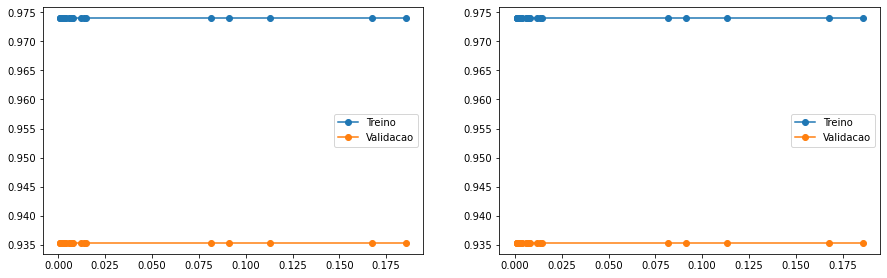

In [12]:
treino_scores = [clf.score(X_train, y_train) for clf in clfs ]
valid_scores = [clf.score(X_val, y_val) for clf in clfs ]


plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(ccp_alphas ,treino_scores , marker="o", label="Treino")
plt.plot(ccp_alphas , valid_scores , marker="o", label="Validacao")
plt.legend()
plt.subplot(2,2,2)
plt.plot(ccp_alphas ,treino_scores , marker="o", label="Treino",drawstyle="steps-post")
plt.plot(ccp_alphas , valid_scores , marker="o", label="Validacao", drawstyle="steps-post")
plt.legend()
plt.show()

In [13]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

acc_train = treino_scores[ind_melhor_arvore]
acc_valid = valid_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {acc_teste*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    97.4
Acurácia da melhor árvore na base de validação: 86.5
Acurácia da melhor árvore na base de teste:     86.5


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [21]:
%%time
# O PCA ordena as colunas por ordem de relevancia no modelo

# Constroindo o PCA
prcomp = PCA(n_components=1).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)
pc_valid = prcomp.transform(X_val)

pc_treino.shape

CPU times: total: 625 ms
Wall time: 480 ms


(5881, 1)

### <font color = "0D5D2E">  __Com apenas 1 componente e 5 colunas__

In [23]:
n=1
colunas = ["cp"+str(x+1) for x in list(range(n))]


pc_teste_coluna = pd.DataFrame(pc_teste[:,:n] , columns=colunas)
pc_treino_coluna = pd.DataFrame(pc_treino[:,:n] , columns=colunas)
pc_valid_coluna = pd.DataFrame(pc_valid[:,:n] , columns=colunas)

pc_treino_coluna.shape

(5881, 1)

In [24]:
%%time

clf = DecisionTreeClassifier(random_state=1234).fit(pc_treino_coluna, y_train)
caminho = DecisionTreeClassifier(random_state=2360873 , min_samples_leaf=20).cost_complexity_pruning_path(pc_treino_coluna, y_train)
ccp_alphas , impurities = caminho.ccp_alphas , caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873 , ccp_alpha=ccp_alpha).fit(pc_treino_coluna, y_train)
    clfs.append(clf)

CPU times: total: 5.17 s
Wall time: 5.51 s


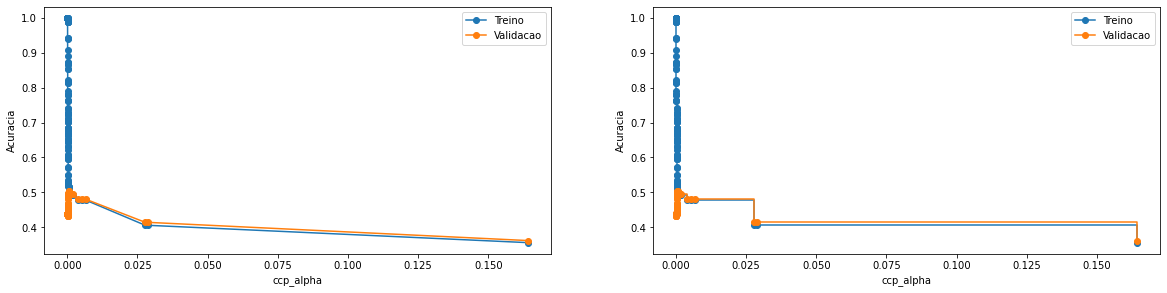

In [25]:
treino_scores_colunas = [clf.score(pc_treino_coluna, y_train) for clf in clfs ]
valid_scores_colunas = [clf.score(pc_valid_coluna, y_val) for clf in clfs ]

plt.subplots(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.subplot(2,2,2)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino",drawstyle="steps-post")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao", drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.show()

In [26]:
ind_melhor_arvore = len(valid_scores_colunas) - valid_scores_colunas[::-1].index(max(valid_scores_colunas)) - 1
melhor_arvore = clfs[ind_melhor_arvore]


print(f'Acurácia da melhor árvore na base de treino:    {treino_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_teste_coluna, y_test)*100:.1f}')

Acurácia da melhor árvore na base de treino:    49.9
Acurácia da melhor árvore na base de validação: 50.3
Acurácia da melhor árvore na base de teste:     44.8


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


### <font color = "0D5D2E">  __com 2 componentes__

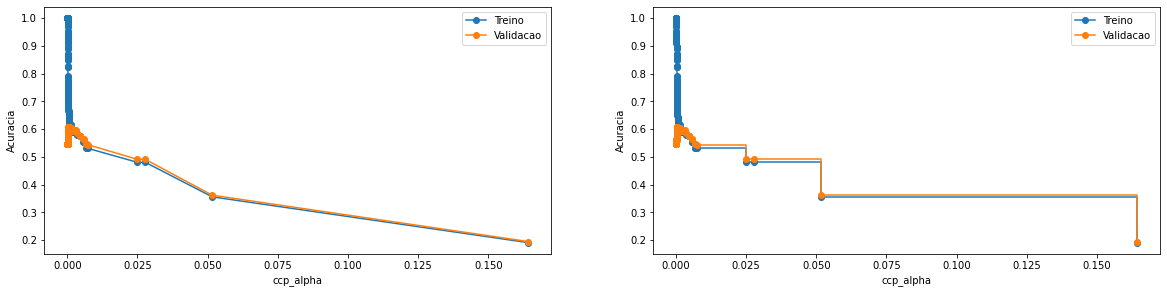

CPU times: total: 8.69 s
Wall time: 9.24 s


In [27]:
%%time
# O PCA ordena as colunas por ordem de relevancia no modelo

# Constroindo o PCA
prcomp = PCA(n_components=2).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)
pc_valid = prcomp.transform(X_val)

n=2
colunas = ["cp"+str(x+1) for x in list(range(n))]


pc_teste_coluna = pd.DataFrame(pc_teste[:,:n] , columns=colunas)
pc_treino_coluna = pd.DataFrame(pc_treino[:,:n] , columns=colunas)
pc_valid_coluna = pd.DataFrame(pc_valid[:,:n] , columns=colunas)




clf = DecisionTreeClassifier(random_state=1234).fit(pc_treino_coluna, y_train)
caminho = DecisionTreeClassifier(random_state=2360873 , min_samples_leaf=20).cost_complexity_pruning_path(pc_treino_coluna, y_train)
ccp_alphas , impurities = caminho.ccp_alphas , caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873 , ccp_alpha=ccp_alpha).fit(pc_treino_coluna, y_train)
    clfs.append(clf)
    
    
 
####

treino_scores_colunas = [clf.score(pc_treino_coluna, y_train) for clf in clfs ]
valid_scores_colunas = [clf.score(pc_valid_coluna, y_val) for clf in clfs ]

plt.subplots(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.subplot(2,2,2)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino",drawstyle="steps-post")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao", drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.show()

In [28]:
ind_melhor_arvore = len(valid_scores_colunas) - valid_scores_colunas[::-1].index(max(valid_scores_colunas)) - 1
melhor_arvore = clfs[ind_melhor_arvore]


print(f'Acurácia da melhor árvore na base de treino:    {treino_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_teste_coluna, y_test)*100:.1f}')

Acurácia da melhor árvore na base de treino:    65.7
Acurácia da melhor árvore na base de validação: 60.7
Acurácia da melhor árvore na base de teste:     58.2


### <font color = "0D5D2E">  __com 5 componentes__

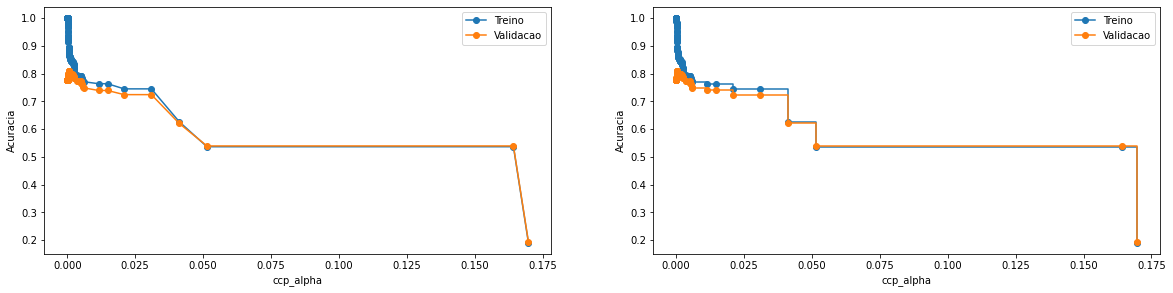

CPU times: total: 7.61 s
Wall time: 7.68 s


In [29]:
%%time
# O PCA ordena as colunas por ordem de relevancia no modelo

# Constroindo o PCA
prcomp = PCA(n_components=5).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)
pc_valid = prcomp.transform(X_val)

n=5
colunas = ["cp"+str(x+1) for x in list(range(n))]


pc_teste_coluna = pd.DataFrame(pc_teste[:,:n] , columns=colunas)
pc_treino_coluna = pd.DataFrame(pc_treino[:,:n] , columns=colunas)
pc_valid_coluna = pd.DataFrame(pc_valid[:,:n] , columns=colunas)




clf = DecisionTreeClassifier(random_state=1234).fit(pc_treino_coluna, y_train)
caminho = DecisionTreeClassifier(random_state=2360873 , min_samples_leaf=20).cost_complexity_pruning_path(pc_treino_coluna, y_train)
ccp_alphas , impurities = caminho.ccp_alphas , caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873 , ccp_alpha=ccp_alpha).fit(pc_treino_coluna, y_train)
    clfs.append(clf)
    
    
 
####

treino_scores_colunas = [clf.score(pc_treino_coluna, y_train) for clf in clfs ]
valid_scores_colunas = [clf.score(pc_valid_coluna, y_val) for clf in clfs ]

plt.subplots(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.subplot(2,2,2)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino",drawstyle="steps-post")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao", drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.show()

In [30]:
ind_melhor_arvore = len(valid_scores_colunas) - valid_scores_colunas[::-1].index(max(valid_scores_colunas)) - 1
melhor_arvore = clfs[ind_melhor_arvore]


print(f'Acurácia da melhor árvore na base de treino:    {treino_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_teste_coluna, y_test)*100:.1f}')

Acurácia da melhor árvore na base de treino:    88.4
Acurácia da melhor árvore na base de validação: 80.8
Acurácia da melhor árvore na base de teste:     77.4


### <font color = "0D5D2E">  __com 10 componentes__

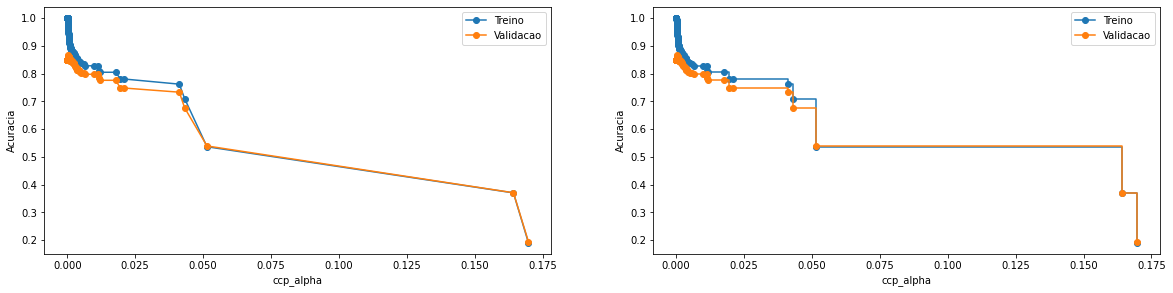

CPU times: total: 13.1 s
Wall time: 13.6 s


In [31]:
%%time
# O PCA ordena as colunas por ordem de relevancia no modelo

# Constroindo o PCA
prcomp = PCA(n_components=10).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)
pc_valid = prcomp.transform(X_val)

n=10
colunas = ["cp"+str(x+1) for x in list(range(n))]


pc_teste_coluna = pd.DataFrame(pc_teste[:,:n] , columns=colunas)
pc_treino_coluna = pd.DataFrame(pc_treino[:,:n] , columns=colunas)
pc_valid_coluna = pd.DataFrame(pc_valid[:,:n] , columns=colunas)




clf = DecisionTreeClassifier(random_state=1234).fit(pc_treino_coluna, y_train)
caminho = DecisionTreeClassifier(random_state=2360873 , min_samples_leaf=20).cost_complexity_pruning_path(pc_treino_coluna, y_train)
ccp_alphas , impurities = caminho.ccp_alphas , caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873 , ccp_alpha=ccp_alpha).fit(pc_treino_coluna, y_train)
    clfs.append(clf)
    
    
 
####

treino_scores_colunas = [clf.score(pc_treino_coluna, y_train) for clf in clfs ]
valid_scores_colunas = [clf.score(pc_valid_coluna, y_val) for clf in clfs ]

plt.subplots(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.subplot(2,2,2)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino",drawstyle="steps-post")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao", drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.show()

In [32]:
ind_melhor_arvore = len(valid_scores_colunas) - valid_scores_colunas[::-1].index(max(valid_scores_colunas)) - 1
melhor_arvore = clfs[ind_melhor_arvore]


print(f'Acurácia da melhor árvore na base de treino:    {treino_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_teste_coluna, y_test)*100:.1f}')

Acurácia da melhor árvore na base de treino:    94.6
Acurácia da melhor árvore na base de validação: 86.6
Acurácia da melhor árvore na base de teste:     81.8


### <font color = "0D5D2E">  __com 50 componentes__

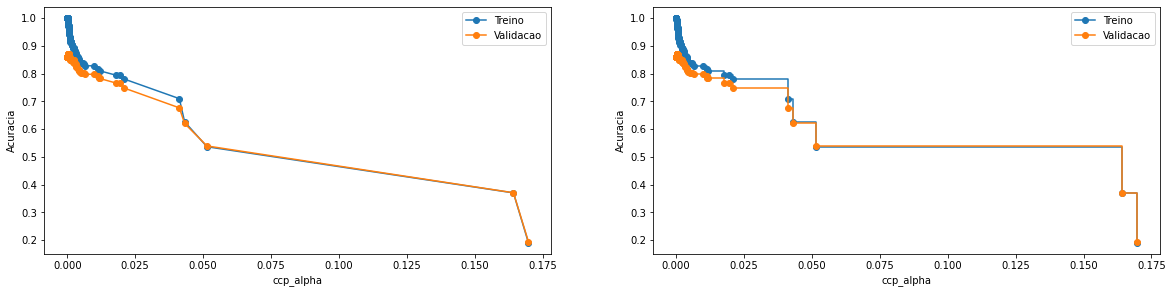

CPU times: total: 59.3 s
Wall time: 60 s


In [33]:
%%time
# O PCA ordena as colunas por ordem de relevancia no modelo

# Constroindo o PCA
prcomp = PCA(n_components=50).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)
pc_valid = prcomp.transform(X_val)

n=50
colunas = ["cp"+str(x+1) for x in list(range(n))]


pc_teste_coluna = pd.DataFrame(pc_teste[:,:n] , columns=colunas)
pc_treino_coluna = pd.DataFrame(pc_treino[:,:n] , columns=colunas)
pc_valid_coluna = pd.DataFrame(pc_valid[:,:n] , columns=colunas)




clf = DecisionTreeClassifier(random_state=1234).fit(pc_treino_coluna, y_train)
caminho = DecisionTreeClassifier(random_state=2360873 , min_samples_leaf=20).cost_complexity_pruning_path(pc_treino_coluna, y_train)
ccp_alphas , impurities = caminho.ccp_alphas , caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873 , ccp_alpha=ccp_alpha).fit(pc_treino_coluna, y_train)
    clfs.append(clf)
    
    
 
####

treino_scores_colunas = [clf.score(pc_treino_coluna, y_train) for clf in clfs ]
valid_scores_colunas = [clf.score(pc_valid_coluna, y_val) for clf in clfs ]

plt.subplots(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.subplot(2,2,2)
plt.plot(ccp_alphas ,treino_scores_colunas , marker="o", label="Treino",drawstyle="steps-post")
plt.plot(ccp_alphas , valid_scores_colunas , marker="o", label="Validacao", drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Acuracia")
plt.legend()
plt.show()

In [34]:
ind_melhor_arvore = len(valid_scores_colunas) - valid_scores_colunas[::-1].index(max(valid_scores_colunas)) - 1
melhor_arvore = clfs[ind_melhor_arvore]


print(f'Acurácia da melhor árvore na base de treino:    {treino_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores_colunas[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_teste_coluna, y_test)*100:.1f}')

Acurácia da melhor árvore na base de treino:    97.3
Acurácia da melhor árvore na base de validação: 87.2
Acurácia da melhor árvore na base de teste:     79.7


## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

### <font color = "0D5D2E">  __Resultado nos dados de testes__

- Acuracia com 1   componente   e  44.8 tempo 5.51 s
- Acuracia com 2   componente   e  58.2 tempo 9.24 s
- Acuracia com 5   componente   e  77.4 tempo 7.68 s
- Acuracia com 10  componente   e  81.8 tempo 13.6 s
- Acuracia com 50  componente   e  79.7 tempo 60 s

### <font color = "0D5D2E">  __Resultado nos dados de validação__

- Acuracia com 1   componente   e  50.3 tempo 5.51 s
- Acuracia com 2   componente   e  60.7 tempo 9.24 s
- Acuracia com 5   componente   e  80.8 tempo 7.68 s
- Acuracia com 10  componente   e  86.6 tempo 13.6 s
- Acuracia com 50  componente   e  87.2 tempo 60 s

- Respondendo as perguntas acima tanto processamento e quanto acuracia de 10 componentes se mostrou mais rapido nos dados de teste e validação do que 50 componentes.

- Observamos nos dados de valição 10 componentes X 50 uma leve acuracia um pouco melhor mais quando olhamos a perfomace de tempo é quase 5 vezes mais rapido.